<a href="https://colab.research.google.com/github/annisaeka123/2341720131_ML_2025/blob/main/JS14/P1_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1

Klasifikasi Cat vs. Dog

Langkah 1 - Import Library

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

Langkah 2.1. Pra Pengolahan Data Training

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pembelajaran Mesin/JS14/dataset/training_set',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pembelajaran Mesin/JS14/dataset/test_set',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


Langkah 3 - Pembuatan Model CNN

In [20]:
cnn = models.Sequential([
    # Conv Layer 1
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    # Conv Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    # Conv Layer 3 (lebih kompleks)
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    # Flatten + Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # kurangi overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile model
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


callbacks untuk training

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

Langkah 4 - Fit CNN (Training)

In [23]:
history = cnn.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 297ms/step - accuracy: 0.5156 - loss: 0.7043 - val_accuracy: 0.6075 - val_loss: 0.6563 - learning_rate: 0.0010
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 288ms/step - accuracy: 0.5801 - loss: 0.6679 - val_accuracy: 0.6695 - val_loss: 0.6270 - learning_rate: 0.0010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 291ms/step - accuracy: 0.6348 - loss: 0.6367 - val_accuracy: 0.7015 - val_loss: 0.5860 - learning_rate: 0.0010
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 289ms/step - accuracy: 0.6629 - loss: 0.6199 - val_accuracy: 0.7185 - val_loss: 0.5477 - learning_rate: 0.0010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 288ms/step - accuracy: 0.6843 - loss: 0.5930 - val_accuracy: 0.7270 - val_loss: 0.5326 - learning_rate: 0.0010
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 285ms/step - accuracy: 0.7040 - loss: 0.5694 - val_accuracy: 0.7405 - val_loss: 0.5327 - learning_rate: 0.0010
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 284ms/step - accuracy: 0.7

Langkah 5 - Prediksi dengan 1 Citra


Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [25]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(
    '/content/drive/MyDrive/Pembelajaran Mesin/JS14/dataset/single_prediction/cat_or_dog_1.jpg',
    target_size=(128, 128)  # harus sama dengan saat training
)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print("Predicted class:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
Predicted class: dog


In [30]:
test_image = image.load_img(
    '/content/drive/MyDrive/Pembelajaran Mesin/JS14/dataset/single_prediction/cat_or_dog_2.jpg',
    target_size=(128, 128)  # harus sama dengan saat training
)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print("Predicted class:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: cat


Prediksi citra yg ada di folder single_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
cat_or_dog_1.jpg --> Predicted class: dog (prob_dog: 1.00)


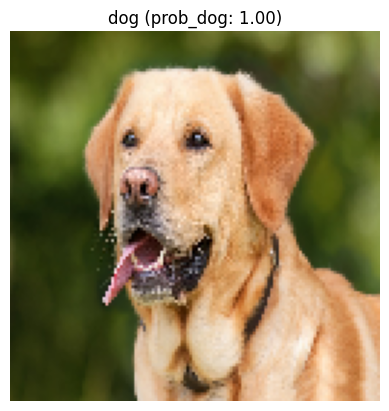

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
cat_or_dog_2.jpg --> Predicted class: cat (prob_dog: 0.00)


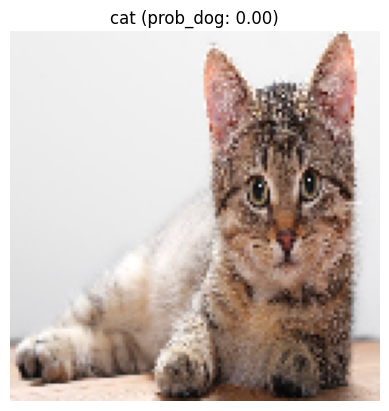

In [29]:
import os
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

folder = '/content/drive/MyDrive/Pembelajaran Mesin/JS14/dataset/single_prediction/'

for img_name in os.listdir(folder):
    img_path = os.path.join(folder, img_name)

    # Load gambar dengan target size yang sama seperti saat training
    img = image.load_img(img_path, target_size=(128,128))

    # Konversi ke array dan normalisasi untuk prediksi
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)  # bentuk batch (1,128,128,3)

    # Prediksi
    result = cnn.predict(img_batch)
    prob = result[0][0]
    prediction = 'dog' if prob > 0.5 else 'cat'

    # Print hasil prediksi dan probabilitas
    print(f"{img_name} --> Predicted class: {prediction} (prob_dog: {prob:.2f})")

    # Visualisasi gambar
    plt.imshow(img_array)  # gunakan img_array
    plt.title(f"{prediction} (prob_dog: {prob:.2f})")
    plt.axis('off')
    plt.show()